In [3]:
#load data; visualize data;#generate new data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
mask = data['pass'] == 1
print(mask)

0       True
1       True
2       True
3       True
4       True
       ...  
113    False
114    False
115    False
116    False
117    False
Name: pass, Length: 118, dtype: bool


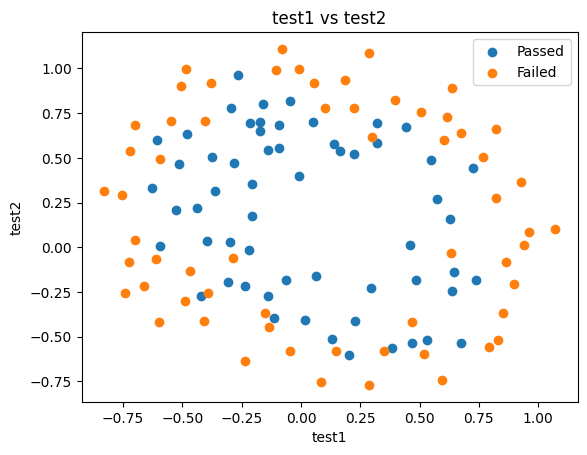

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig2 = plt.figure()
passed = plt.scatter(data['test1'][mask], data['test2'][mask])
failed = plt.scatter(data['test1'][~mask], data['test2'][~mask])
plt.xlabel('test1')
plt.ylabel('test2')
plt.title('test1 vs test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()


In [9]:
#establish model and train it; predict
x1=data['test1']
x2=data['test2']
y=data['pass']
x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2
x_new = {'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_new,y)

y_pred = model.predict(x_new)
print(y_pred)

           x1        x2      x1_2      x2_2     x1_x2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4   -0.513250  0.465640  0.263426  0.216821 -0.238990
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]
[1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 1]


In [10]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred))


0.8135593220338984


112   NaN
86    NaN
84    NaN
111   NaN
113   NaN
       ..
70    NaN
65    NaN
68    NaN
67    NaN
101   NaN
Name: test1, Length: 118, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


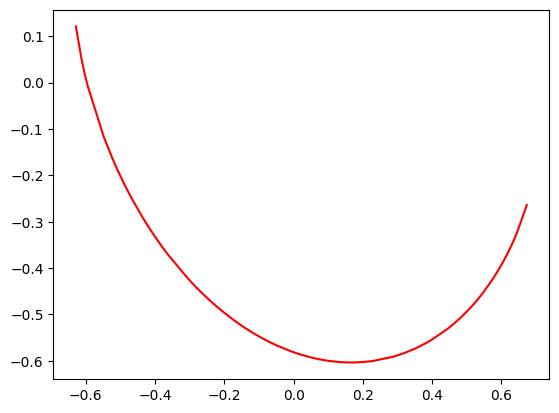

In [11]:
#decision boundary
x_new = x1.sort_values()
theta0 = model.intercept_
theta1,theta2,theta3,theta4,theta5 = model.coef_[0][0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3], model.coef_[0][4]
a = theta4
b = theta5*x_new + theta2
c = theta0 + theta1*x_new + theta3*x_new*x_new
X2_new_boundary = (-b + np.sqrt(b*b - 4*a*c))/(2*a)


<ipython-input-12-049ce335127d>:32: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary.append((-b.iloc[i] + np.sqrt(b.iloc[i]*b.iloc[i] - 4*a*c.iloc[i]))/(2*a))


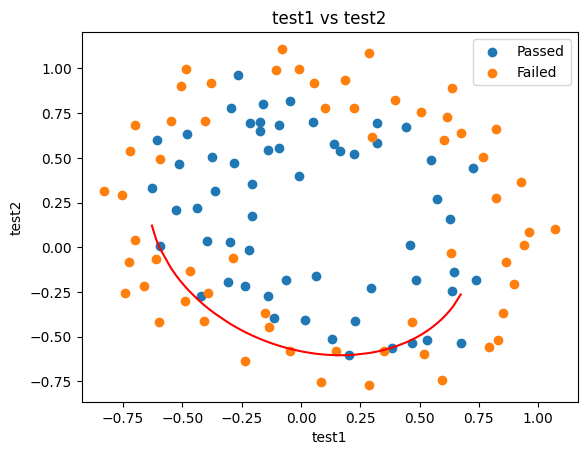

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#decision boundary
x_new = x1.sort_values()
theta0 = model.intercept_
theta1,theta2,theta3,theta4,theta5 = model.coef_[0][0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3], model.coef_[0][4]
a = theta4
b = theta5*x_new + theta2
c = theta0 + theta1*x_new + theta3*x_new*x_new

# Calculate the decision boundary.  Handle potential errors
X2_new_boundary = []
for i in range(len(b)):
  try:
    X2_new_boundary.append((-b.iloc[i] + np.sqrt(b.iloc[i]*b.iloc[i] - 4*a*c.iloc[i]))/(2*a))
  except ValueError:
    # Handle cases where the discriminant is negative
    X2_new_boundary.append(np.nan) # Or another appropriate value

X2_new_boundary = pd.Series(X2_new_boundary, index=x_new.index)

# Plotting
fig2 = plt.figure()
passed = plt.scatter(data['test1'][mask], data['test2'][mask])
failed = plt.scatter(data['test1'][~mask], data['test2'][~mask])
plt.xlabel('test1')
plt.ylabel('test2')
plt.title('test1 vs test2')
plt.legend((passed, failed), ('Passed', 'Failed'))

# Plot the decision boundary
plt.plot(x_new, X2_new_boundary, color='red', label='Decision Boundary')

plt.show()


In [13]:
#define the f(x)
def f(x):
  a = theta4
  b = theta5*x + theta2
  c = theta0 + theta1*x + theta3*x*x
  X2_new_boundary1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
  X2_new_boundary2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)
  return X2_new_boundary1,X2_new_boundary2




<ipython-input-16-bcc004703a8e>:20: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
<ipython-input-16-bcc004703a8e>:21: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)


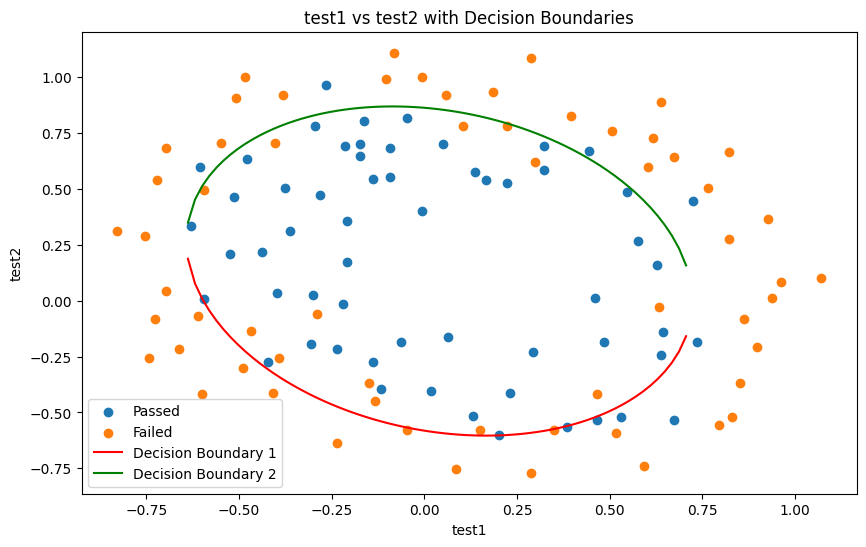

In [17]:
# Calculate corresponding y values for the decision boundary
X2_new_boundary1_vals = []
X2_new_boundary2_vals = []
for x in x_vals:
    try:
        b1, b2 = f(x)
        X2_new_boundary1_vals.append(b1)
        X2_new_boundary2_vals.append(b2)
    except ValueError:  # Handle cases where the discriminant is negative
        X2_new_boundary1_vals.append(np.nan)
        X2_new_boundary2_vals.append(np.nan)

fig3 = plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
passed = plt.scatter(data['test1'][mask], data['test2'][mask], label='Passed')
failed = plt.scatter(data['test1'][~mask], data['test2'][~mask], label='Failed')
plt.xlabel('test1')
plt.ylabel('test2')
plt.title('test1 vs test2 with Decision Boundaries')
plt.legend(handles=[passed, failed])  # Pass handles to legend

# Plot both decision boundaries
plt.plot(x_vals, X2_new_boundary1_vals, color='red', label='Decision Boundary 1')
plt.plot(x_vals, X2_new_boundary2_vals, color='green', label='Decision Boundary 2')

plt.legend()
plt.show()
